In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


THÔNG TIN SINH VIÊN

Họ tên: Phan Anh Lộc

MSSV: 19521766

Bài thực hành số 2

IMPORT CÁC THƯ VIỆN

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import matplotlib.pyplot as plt
import os 
import numpy as np
from scipy import ndimage

In [3]:
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

1. YÊU CẦU 1

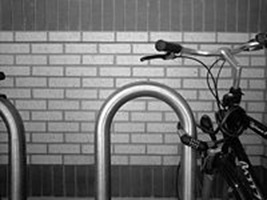

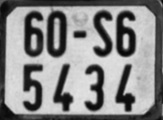

In [4]:
bicycle_path = os.path.join(dir_images, 'Bicycle.jpg')
bansoxe_path = os.path.join(dir_images, 'bansoxejpg.jpg')

bicycle_img = cv.imread(bicycle_path, 0)
bansoxe_img = cv.imread(bansoxe_path, 0)

cv2_imshow(bicycle_img)
cv2_imshow(bansoxe_img)

In [5]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    # Ix = ndimage.filters.convolve(img, Kx)
    # Iy = ndimage.filters.convolve(img, Ky)
    Ix = cv.filter2D(img, -1, Kx)
    Iy = cv.filter2D(img, -1, Ky)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta, Ix, Iy)

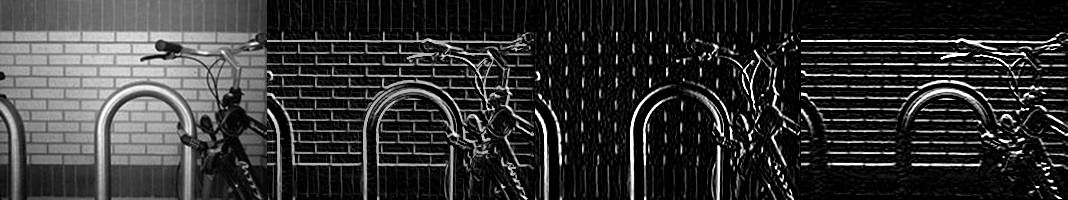

In [6]:
G1, theta1, Ix1, Iy1 = sobel_filters(bicycle_img)
hstack_1 = np.hstack((bicycle_img, G1, Ix1, Iy1))
cv2_imshow(hstack_1)

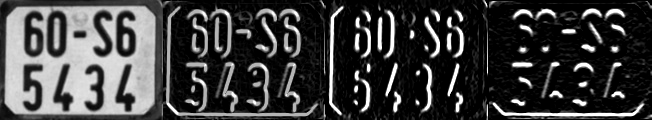

In [7]:
G2, theta2, Ix2, Iy2 = sobel_filters(bansoxe_img)
hstack_2 = np.hstack((bansoxe_img, G2, Ix2, Iy2))
cv2_imshow(hstack_2)

2. YÊU CẦU 2

In [8]:
def feature_image(img):
  img_copy = img.copy()
  img_resized = cv.resize(img_copy, (256, 256))
  G_, theta_, Ix_, Iy_ = sobel_filters(img_resized)
  arr = []
  for i in range(G_.shape[0]):
    tmp = 0
    for j in range(G_.shape[1]):
      tmp = tmp + G_[i,j]
    arr.append(tmp)

  for j in range(G_.shape[1]):
    tmp = 0
    for i in range(G_.shape[0]):
      tmp = tmp + G_[i,j]
    arr.append(tmp)

  return arr

+ ĐỌC ẢNH

In [9]:
path_img_0814 = os.path.join(dir_images, 'image_0814.jpg')
path_img_0816 = os.path.join(dir_images, 'image_0816.jpg')
path_img_1248 = os.path.join(dir_images, 'image_1248.jpg')

img_0814 = cv.imread(path_img_0814,0)
img_0816 = cv.imread(path_img_0816,0)
img_1248 = cv.imread(path_img_1248,0)

+ HIỂN THỊ ẢNH ĐÃ ĐỌC

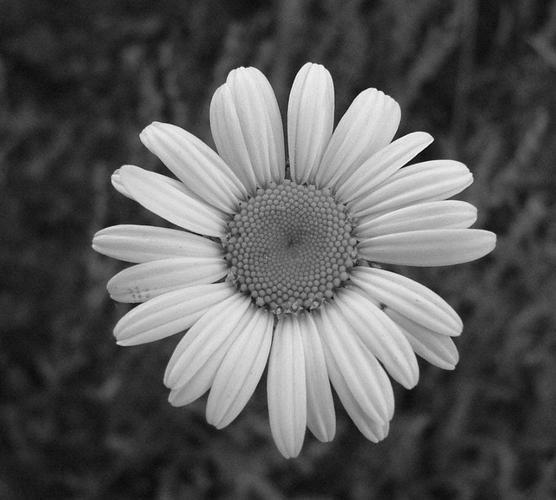

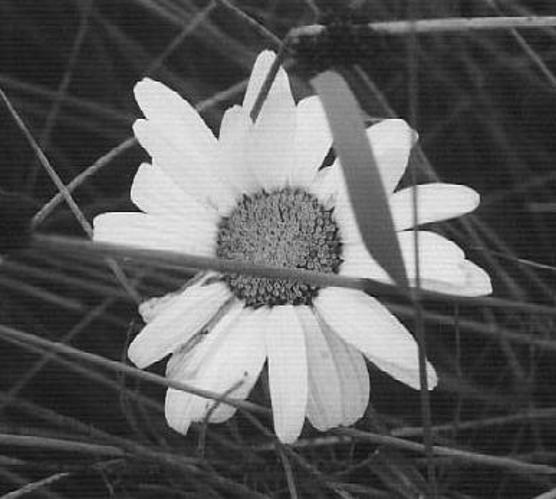

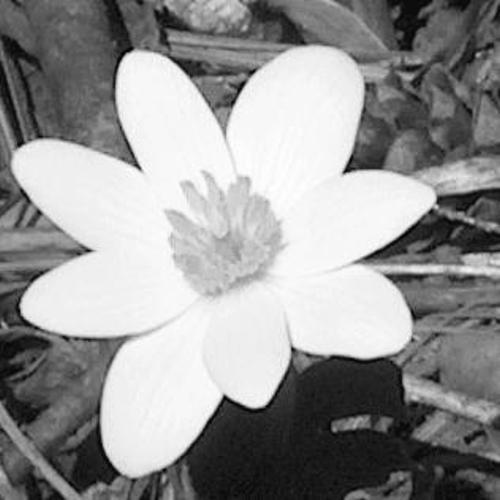

In [10]:
cv2_imshow(img_0814)
cv2_imshow(img_0816)
cv2_imshow(img_1248)

+ TÍNH KHOẢNG CÁCH ẢNH 0814 VÀ 0816

In [11]:
feature_vector_img_0814 = feature_image(img_0814)
feature_vector_img_0816 = feature_image(img_0816)
distance1 = distance.euclidean(feature_vector_img_0814, feature_vector_img_0816)
print(distance1)

55432.88078311733


+ TÍNH KHOẢNG CÁCH ẢNH 0814 VÀ 1248

In [12]:
feature_vector_img_0814 = feature_image(img_0814)
feature_vector_img_1248 = feature_image(img_1248)
distance2 = distance.euclidean(feature_vector_img_0814, feature_vector_img_1248)
print(distance2)

92123.37554385341


+ TÍNH SỰ TƯƠNG ĐỒNG ẢNH 0814 VÀ 0816

In [13]:
1 - distance.cosine(feature_vector_img_0814, feature_vector_img_0816)

0.9403013260778476

+ TÍNH SỰ TƯƠNG ĐỒNG ẢNH 0814 VÀ 1248

In [14]:
1 - distance.cosine(feature_vector_img_0814, feature_vector_img_1248)

0.8133452847890963